# Exercise 4a - Image Filtering

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

### Filtering using correlation

In [2]:
from scipy.ndimage import correlate
input_img = np.arange(25).reshape(5, 5)
print(input_img)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [3]:
weights = [[0, 1, 0],
		   [1, 2, 1],
		   [0, 1, 0]]
           
res_img = correlate(input_img, weights)

#### Exercise 1

In [4]:
print(res_img)

[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


### Border handling

#### Exercise 2

In [5]:
reflection_img = correlate(input_img, weights, mode='reflect')
constant_img = correlate(input_img, weights, mode='constant', cval = 10)

In [6]:
print(reflection_img)

[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


In [7]:
print(constant_img)

[[ 26  20  25  30  40]
 [ 36  36  42  48  54]
 [ 61  66  72  78  79]
 [ 86  96 102 108 104]
 [ 96 110 115 120 110]]


### Mean filtering

#### Exercise 3

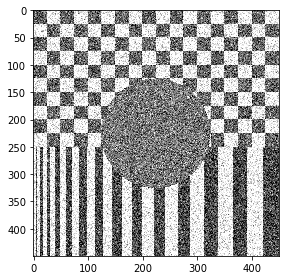

In [8]:
img_org = io.imread('data/Gaussian.png')

io.imshow(img_org)
io.show()

In [9]:
def apply_mean_filter(img, size):
    weights = np.ones([size, size])
    weights = weights / np.sum(weights)

    out_img = correlate(img, weights, mode='reflect')
    return out_img

In [10]:
gauss5 = apply_mean_filter(img_org, size = 5)
gauss10 = apply_mean_filter(img_org, size = 10)
gauss20 = apply_mean_filter(img_org, size = 20)
gauss40 = apply_mean_filter(img_org, size = 30)

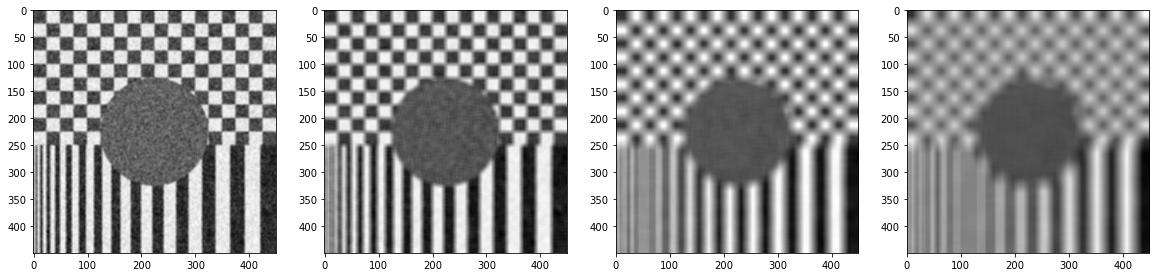

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(gauss5, cmap = 'gray')
ax[1].imshow(gauss10, cmap = 'gray')
ax[2].imshow(gauss20, cmap = 'gray')
ax[3].imshow(gauss40, cmap = 'gray')
plt.show()

### Median filtering

#### Exercise 4

In [12]:
from skimage.filters import median

In [13]:
def apply_median_filter(img, size):
    footprint = np.ones([size, size])
    med_img = median(img, footprint)
    return med_img

In [14]:
median5 = apply_median_filter(img_org, size = 5)
median10 = apply_median_filter(img_org, size = 10)
median20 = apply_median_filter(img_org, size = 20)
median40 = apply_median_filter(img_org, size = 30)

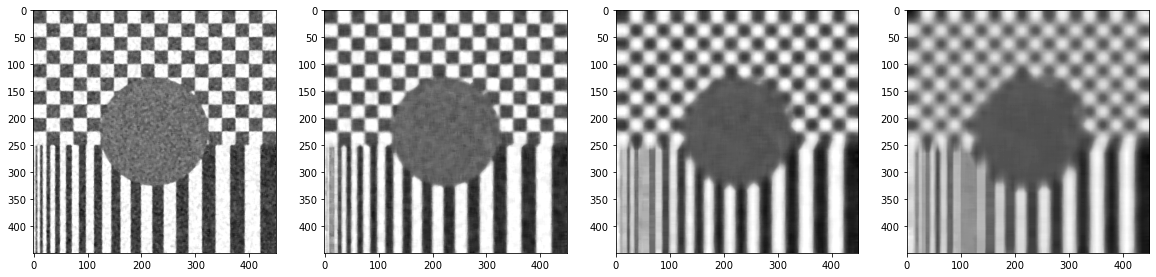

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(median5, cmap = 'gray')
ax[1].imshow(median10, cmap = 'gray')
ax[2].imshow(median20, cmap = 'gray')
ax[3].imshow(median40, cmap = 'gray')
plt.show()

### Compare mean and median filtering

#### Exercise 5

In [16]:
img_org = io.imread('data/SaltPepper.png')
mean5 = apply_mean_filter(img_org, size = 5)
median5 = apply_median_filter(img_org, size = 5)
mean20 = apply_mean_filter(img_org, size =20)
median20 = apply_median_filter(img_org, size = 20)

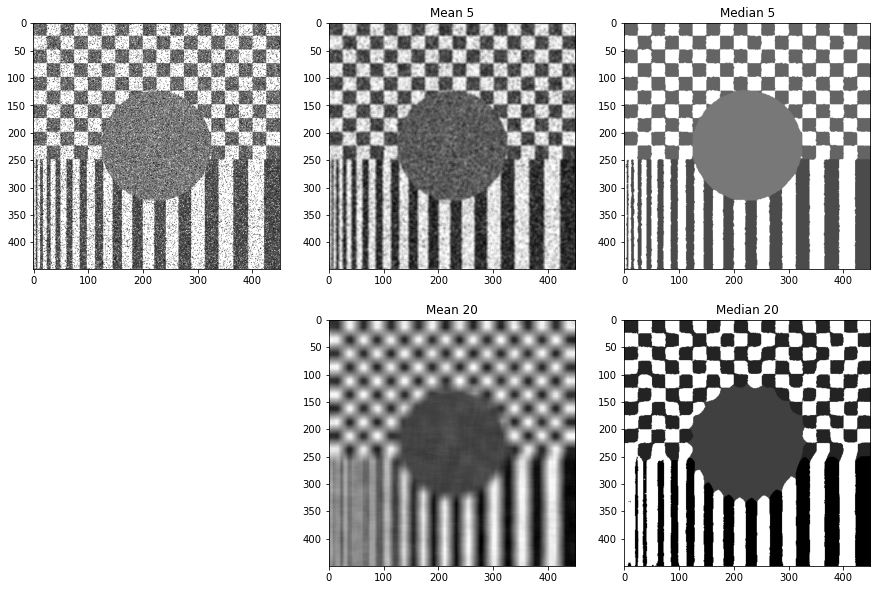

In [17]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
ax[0,0].imshow(img_org, cmap = 'gray')
ax[0,1].imshow(mean5, cmap = 'gray')
ax[0,1].set_title('Mean 5')
ax[0,2].imshow(median5, cmap = 'gray')
ax[0,2].set_title('Median 5')
ax[1,0].set_axis_off()
ax[1,1].imshow(mean20, cmap = 'gray')
ax[1,1].set_title('Mean 20')
ax[1,2].imshow(median20, cmap = 'gray')
ax[1, 2].set_title('Median 20')
plt.show()

### Gaussian filter

#### Exercise 6

In [18]:
from skimage.filters import gaussian

In [19]:
img_gauss = io.imread('data/Gaussian.png')

In [20]:
gauss1 = gaussian(img_gauss, 1)
gauss5 = gaussian(img_gauss, 5)
gauss10 = gaussian(img_gauss, 10)

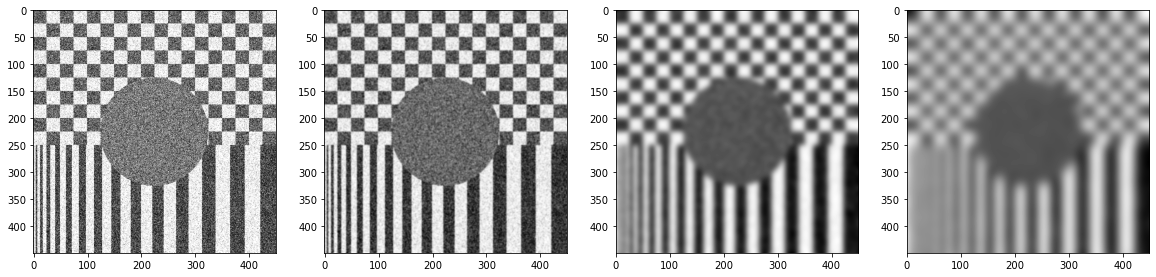

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(img_gauss, cmap = 'gray')
ax[1].imshow(gauss1, cmap = 'gray')
ax[2].imshow(gauss5, cmap = 'gray')
ax[3].imshow(gauss10, cmap = 'gray')
plt.show()

#### Exercise 7

In [22]:
from skimage import color

In [23]:
car_img = io.imread('data/car.png')
car_gray = color.rgb2gray(car_img)

size = 10
car_mean = apply_mean_filter(car_gray, size)
car_median = apply_median_filter(car_gray, size)
car_gauss = gaussian(car_gray, size)

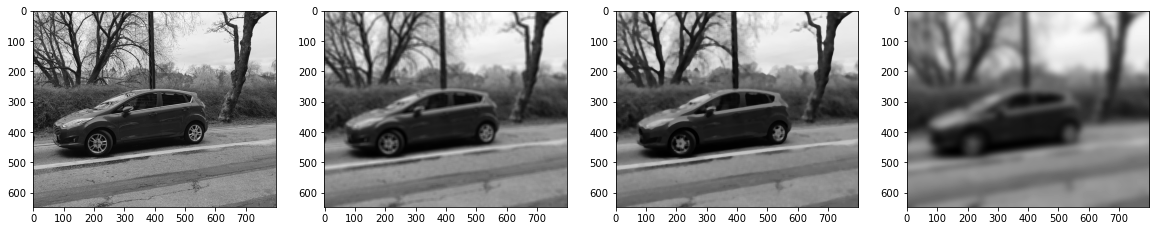

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))
ax[0].imshow(car_gray, cmap = 'gray')
ax[1].imshow(car_mean, cmap = 'gray')
ax[2].imshow(car_median, cmap = 'gray')
ax[3].imshow(car_gauss, cmap = 'gray')
plt.show()

### Edge filters

In [25]:
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt

from skimage.util import img_as_ubyte, img_as_float

#### Exercise 8
Notice that the output range is [-1, 1] (The original description of the exercise had a typo!)

In [26]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [27]:
img_org = io.imread('data/donald_1.png')
img_gray = color.rgb2gray(img_org)
img_h = prewitt_h(img_gray)
img_v = prewitt_v(img_gray)

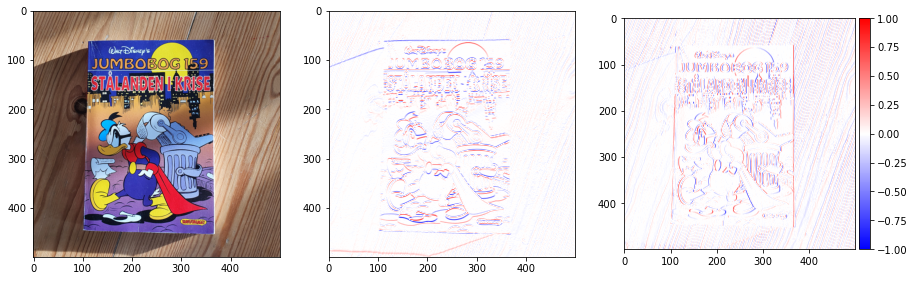

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
ax[0].imshow(img_org)
ax[1].imshow(img_h, cmap = 'bwr', vmin = -1, vmax = 1)

im = ax[2].imshow(img_v, cmap = 'bwr', vmin = -1, vmax = 1)
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.show()

#### Exercise 9

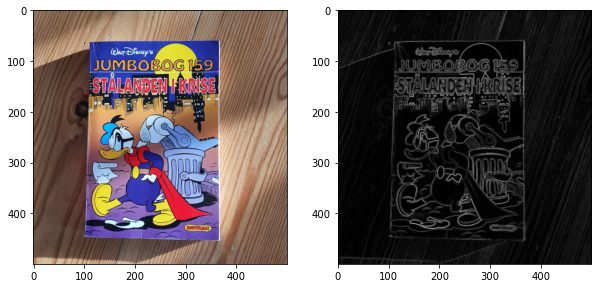

In [29]:
img_prewitt = prewitt(img_gray)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax[0].imshow(img_org)
ax[1].imshow(img_prewitt, cmap = 'gray', vmin = 0, vmax = 1)
plt.show()

### Edge detection in medical images

#### Exercise 10

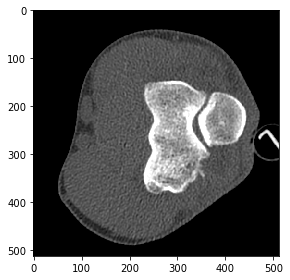

In [30]:
img_org = io.imread('data/ElbowCTSlice.png')
io.imshow(img_org)
io.show()

In [31]:
def edge_detection(img, filter_type, kernel_size, thres, plot = False):
    '''
    img: (2D ndarray)
    filter_type: (str) 'gaussian' or 'median'
    kernel_size: (int) size of the smoothing filter
    thres: (float) threshold for the binarization
    plot: (bool) whether plot the images. Default False.
    '''

    if filter_type == 'gaussian':
        img_filt = gaussian(img, kernel_size)
    elif filter_type == 'median':
        img_filt = apply_median_filter(img, kernel_size)

    gradients = prewitt(img_filt)
    edges = gradients > thres

    if plot:
        fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (10,5))
        ax[0].imshow(img_filt, cmap = 'gray')
        ax[1].imshow(gradients, cmap = 'gray')
        ax[2].imshow(edges, cmap = 'gray')
        [ax_.set_axis_off() for ax_ in ax]
        plt.show()

    return edges

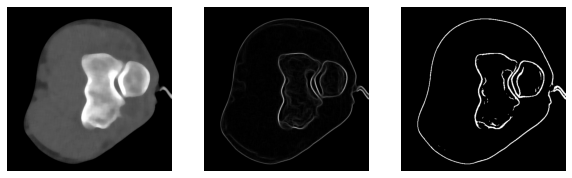

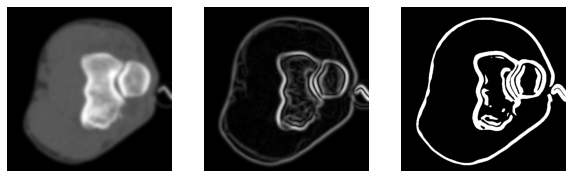

In [32]:
edges = edge_detection(img_org, 'median', 15, 0.05, True)
edges = edge_detection(img_org, 'gaussian', 5, 0.02, True)

### Video filtering

#### Exercise 11

In [33]:
!python video_filtering.py 1 0 0

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


[ WARN:0@8.473] global D:\bld\libopencv_1654062788235\work\modules\videoio\src\cap_msmf.cpp (539) `anonymous-namespace'::SourceReaderCB::~SourceReaderCB terminating async callback


In [34]:
!python video_filtering.py 1 1 0

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


[ WARN:0@7.123] global D:\bld\libopencv_1654062788235\work\modules\videoio\src\cap_msmf.cpp (539) `anonymous-namespace'::SourceReaderCB::~SourceReaderCB terminating async callback


#### Exercise 12

In [35]:
!python video_filtering.py 1 1 1

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


[ WARN:0@7.906] global D:\bld\libopencv_1654062788235\work\modules\videoio\src\cap_msmf.cpp (539) `anonymous-namespace'::SourceReaderCB::~SourceReaderCB terminating async callback
